# Depth First Search - Preparations

Here we want to implement a depth first search algorithm to find all vertices in an digraph, which are reachable from a given vertex.

## Definition of a Class for Vertices

At first we define a class for a single vertex. We will store its name, a label and its adjecent vertices. Hence we will not introduce an edge class.

In [1]:
class node():
    def __init__(self, name, label, adjacent):
        self.name = name
        self.label = label
        self.adjacent = set(adjacent)
        
    def add(self, vertex):
        self.adjacent.add(vertex)

## Read Graph Data 

Next we read the graph which is stored in an xml file. We use the parser minidom from the xml.dom module. Note that we use digraphs.

In [2]:
file = 'graph_data.xml'
from xml.dom import minidom

In [3]:
def read_graph(file):
    """
    This file reads an the graph data from an xml-file and outputs a dictionary of vertices (of class node).
    """
    graph_xml = minidom.parse(file)
    vertex_list = graph_xml.getElementsByTagName('vertex')
    vertices = {}
    for x in vertex_list:
        vertices[x.getAttribute('id')] = node(x.getAttribute('id'), x.getAttribute('label'), set())
    
    edge_list = graph_xml.getElementsByTagName('edge')
    for x in edge_list:
        vertices[x.getAttribute('tail')].add(x.getAttribute('head'))
        
    return(vertices)    

In [4]:
vertices = read_graph(file)

## Graph Visualization

We use the module graphviz to visualize our graph. Note that you also need to install GraphViz2: https://www.graphviz.org/download/ 
The path of the software needs to be added to the environment Modify it, if the software has been installed to a different directory.

In [5]:
path = 'F:/Program Files (x86)/Graphviz2.38/bin/'
import os
os.environ["PATH"] += os.pathsep + path

from graphviz import Digraph
from IPython.display import Image

In [6]:
def visualize_graph(vertices, color_dict = {}):
    """
    This function takes a dictionary of vertices and saves the graph with a picture locally.
    """
    dot = Digraph(format='png')

    for key, node in vertices.items():
        if node.name in color_dict.keys():
            dot.node(node.name, node.label, style='filled', fillcolor=color_dict[node.name])
        else:
            dot.node(node.name, node.label)
        for x in node.adjacent:
            dot.edge(key, x)

    path_graph = dot.render('pictures/graph.gv', view=False)
    return(path_graph)

In [7]:
path_graph = visualize_graph(vertices)

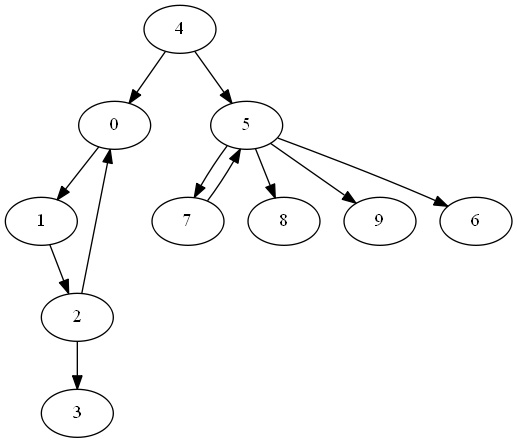

In [8]:
Image(path_graph)

# Depth First Search

We use depth first search to find all vertices, which can be reached from a given vertex.

In [9]:
def dfs(vertices, init_vertex_name):
    """
    Implementation of depth first search.
    """
    visited = set()
    unvisited = set(vertices.keys())

    stack = [init_vertex_name]
    adjacent = set()
    
    while stack != []:
        current_vertex_name = stack.pop()
        visited.add(current_vertex_name)
        for x in vertices[current_vertex_name].adjacent:
            if x not in visited:
                stack.append(x)
                adjacent.add(x)
    
    return(adjacent)

Please Enter the name of the initial node!

In [10]:
init_vertex = '1'

In [11]:
adjacent = dfs(vertices, init_vertex)

color_dict = {x: 'blue' for x in adjacent}
color_dict[init_vertex] = 'grey'

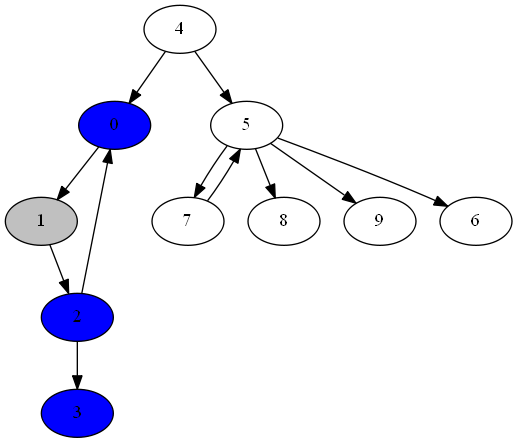

In [12]:
path_graph = visualize_graph(vertices, color_dict)
Image(path_graph)